<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/statistical_analysis/car_crashes/crashes_temporalseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy import stats

In [27]:
acidentes = pd.read_excel('Acidentes_de_Trânsito_Ex2.xlsx')
acidentes = acidentes.dropna()
acidentes.columns = ['Serie 1980-90','Meses','Obitos']

acidentes.drop(acidentes.index[:1], inplace=True)
acidentes.index = acidentes.index - 2
acidentes.head()


,Serie 1980-90,Meses,Obitos
0,1,1980-01-01 00:00:00,206
1,2,1980-02-01 00:00:00,201
2,3,1980-03-01 00:00:00,230
3,4,1980-04-01 00:00:00,201
4,5,1980-05-01 00:00:00,241


In [28]:
acidentes['Obitos'] = pd.to_numeric(acidentes['Obitos'])
acidentes['Serie 1980-90'] = pd.to_numeric(acidentes['Serie 1980-90']) 

acidentes.head()

,Serie 1980-90,Meses,Obitos
0,1,1980-01-01 00:00:00,206
1,2,1980-02-01 00:00:00,201
2,3,1980-03-01 00:00:00,230
3,4,1980-04-01 00:00:00,201
4,5,1980-05-01 00:00:00,241


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


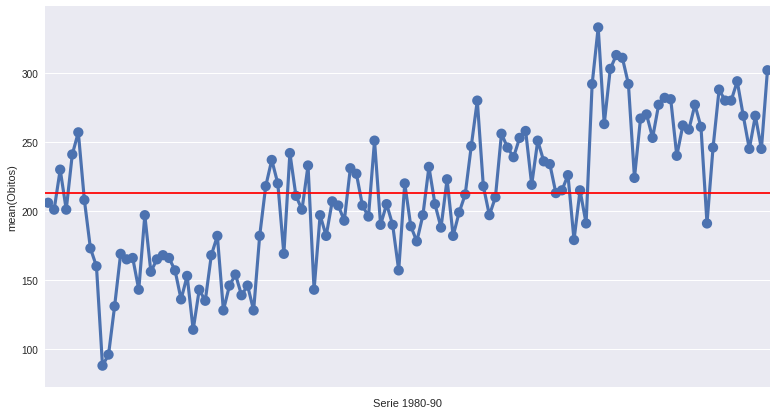

In [29]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x='Serie 1980-90', y='Obitos', data=acidentes)
ax.axhline(acidentes['Obitos'].mean(), color='r', label='Mean')

ax.set_xticklabels([])
plt.show()

# We can se a very low Secular positive trend
# Postive random variation

In [30]:
X = acidentes['Obitos'].values
X = np.log(X)
half = len(X) / 2

X_1, X_2 = X[0:int(half)], X[int(half):]
Mean_1, Mean_2 = X_1.mean(), X_2.mean()
Var_1, Var_2 = X_1.var(), X_2.var()

print('Mean_1 = %f, Mean_2 = %f' % (Mean_1, Mean_2))
print('variance_1 = %f, Variance_2 = %f' % (Var_1, Var_2))

Mean_1 = 5.170735, Mean_2 = 5.493028
variance_1 = 0.051887, Variance_2 = 0.024557


In [40]:
acidentes['Box_Cox_T'], lambd = stats.boxcox(acidentes['Obitos'])



acidentes.head()
print(lambd)

0.9987227667073223


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


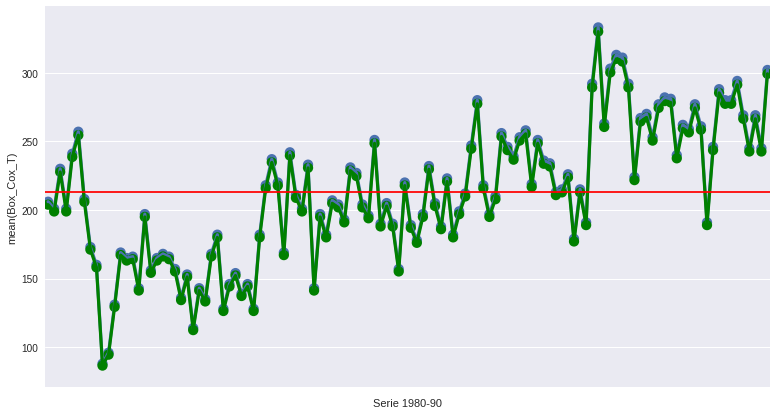

In [41]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x='Serie 1980-90', y='Obitos', data=acidentes)
ax = sns.pointplot(x='Serie 1980-90', y='Box_Cox_T', data=acidentes, color='g')
ax.axhline(acidentes['Obitos'].mean(), color='r', label='Mean')


ax.set_xticklabels([])
plt.show()

# We can se a very low Secular positive trend
# Postive random variation

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


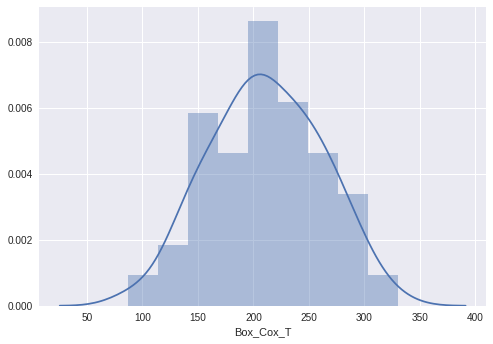

In [43]:
sns.distplot(acidentes['Box_Cox_T'])